# <center> </center>
# <center> 9a. Volatility
## <center> ECO374

In [1]:
pth_packages = ['yfinance']
import subprocess, sys
for pkg in pth_packages: subprocess.run([sys.executable, '-m', 'pip', 'install', pkg, '--quiet'], check=True)
import yfinance as yf, matplotlib.pyplot as plt, numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Data: mean and variance

Data: S&P500 index ([Source](https://finance.yahoo.com/quote/^GSPC/))

In [2]:
GSPC = yf.download('^GSPC', start='2000-01-01', progress=False, auto_adjust=False)
SP500 = GSPC['Close']

Plot data

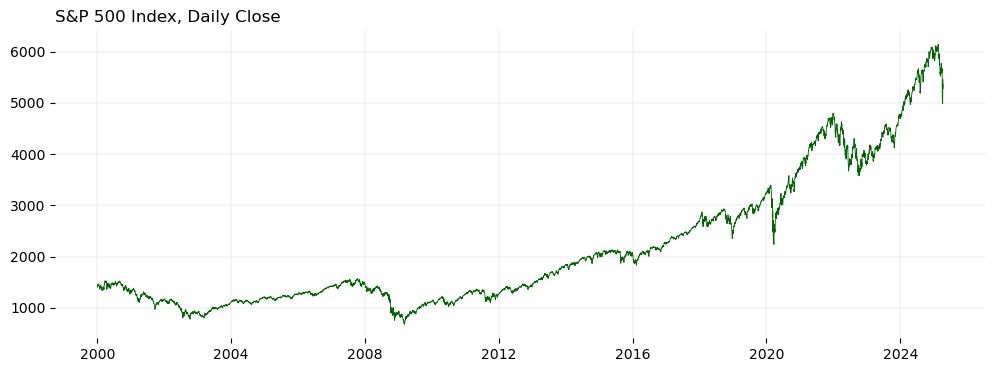

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(SP500, '-', color='darkgreen', linewidth=0.6)
plt.title('S&P 500 Index, Daily Close', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

Plot of returns

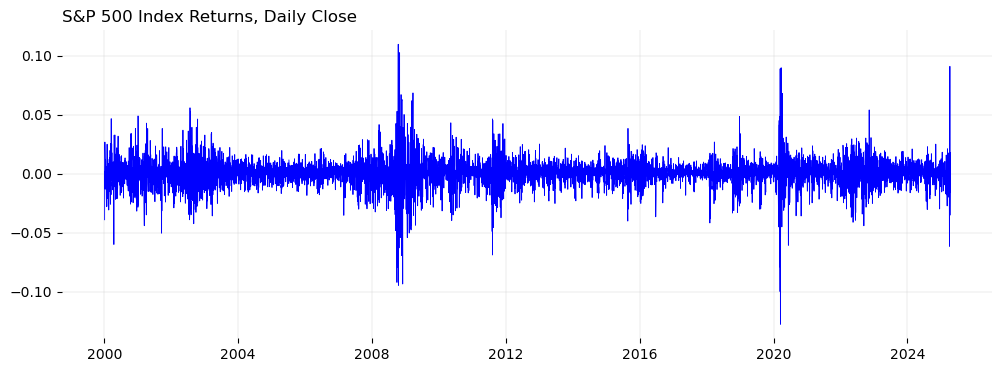

In [4]:
SP500_r = np.log(SP500).diff().dropna()

plt.figure(figsize=(12, 4))
plt.plot(SP500_r, '-', color='blue', linewidth=0.6)
plt.title('S&P 500 Index Returns, Daily Close', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

Mean of returns

In [5]:
print(SP500_r.mean())

Ticker
^GSPC    0.000205
dtype: float64


Note that the mean of the returns is essentially zero, and hence returns SQUARED closely approximate the VARIANCE of the returns.

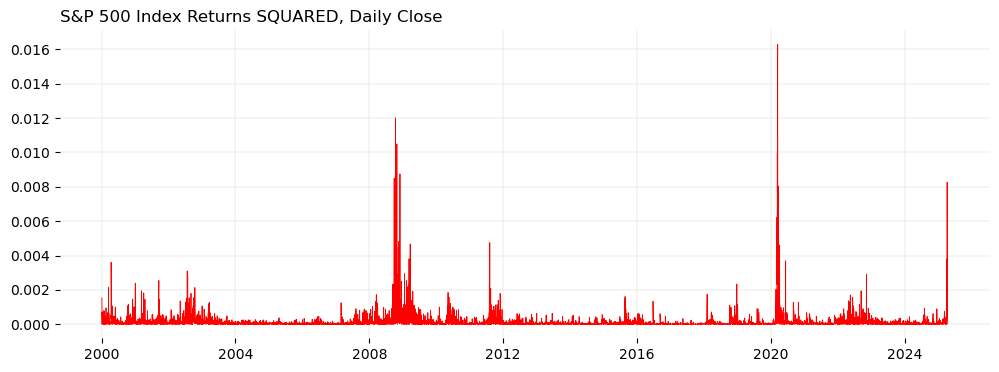

In [6]:
SP500_rS = SP500_r**2

plt.figure(figsize=(12, 4))
plt.plot(SP500_rS, '-', color='red', linewidth=0.6)
plt.title('S&P 500 Index Returns SQUARED, Daily Close', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

# 2. ACF and PACF

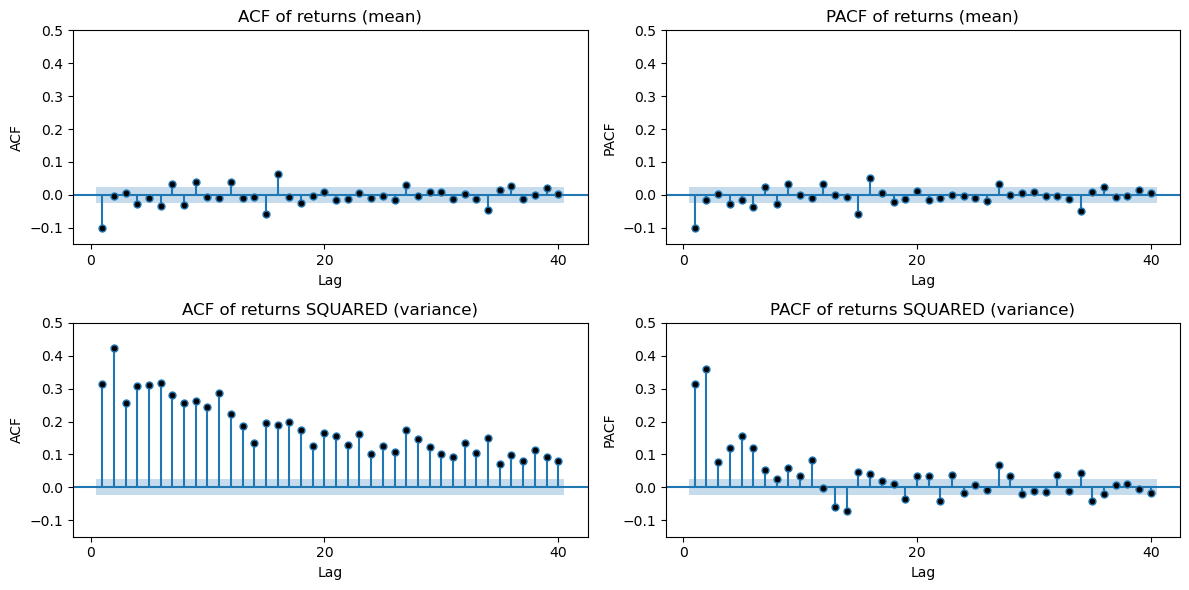

In [7]:
lag_max = 40

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axs = axs.flatten()

plot_acf(SP500_r, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[0])
axs[0].set_title('ACF of returns (mean)')
axs[0].set_ylabel('ACF')

plot_pacf(SP500_r, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_title('PACF of returns (mean)')
axs[1].set_ylabel('PACF')

plot_acf(SP500_rS, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[2])
axs[2].set_title('ACF of returns SQUARED (variance)')
axs[2].set_ylabel('ACF')

plot_pacf(SP500_rS, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_title('PACF of returns SQUARED (variance)')
axs[3].set_ylabel('PACF')

for ax in axs:
  ax.set_ylim(-0.15,0.5)
  ax.set_xticks(np.arange(0, lag_max+1, step=20))
  ax.set_xlabel('Lag')

fig.tight_layout()
plt.show()